El modo es: 0.9797958971132713
La raíz encontrada es: 0.06999999992083758 y 0.03774569434787369


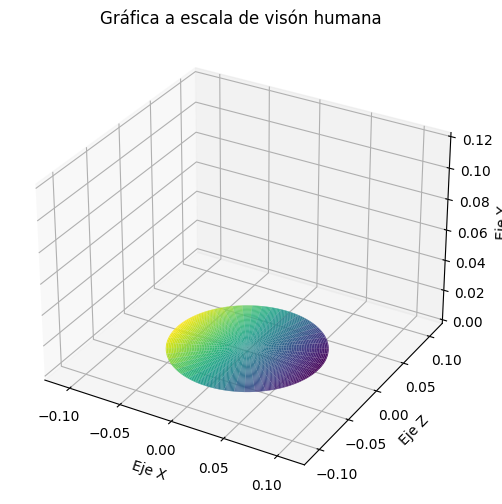

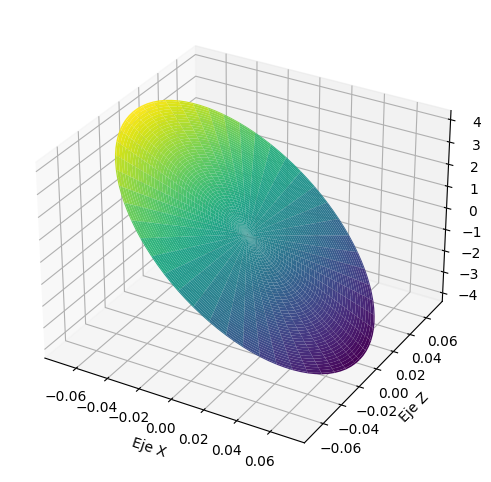

In [1]:
import numpy as np
from scipy.special import jn
from scipy.special import jn_zeros
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Malla 2D
radius = 0.07
num_points = 100

phi_0 = np.linspace(0, 2*np.pi, num_points)
r_0 = np.linspace(0, radius, num_points)
phi, r = np.meshgrid(phi_0, r_0)


#Funciones
def bessel(r,m):
  # Calcula la función de Bessel (J0) aplicada a las coordenadas en el eje z
  Z = jn(m, k * r)
  return Z

def funcion(x):
    # Define la función que quieres analizar
    return jn(m,x)  # Ejemplo: x^2 - 4 = 0, cuya solución es x = 2 o x = -2

def encontrar_raiz(funcion, a, b, tolerancia=1e-10, max_iter=1000000):
    # Encuentra la raíz de la función en el intervalo [a, b] utilizando el método de bisección

    # Verifica si la función tiene signos opuestos en los extremos del intervalo
    if funcion(a) * funcion(b) > 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    iteracion = 0
    while (b - a) / 2 > tolerancia and iteracion < max_iter:
        c = (a + b) / 2
        if funcion(c) == 0:
            return c  # ¡Encontramos la raíz exacta!
        elif funcion(c) * funcion(a) < 0:
            b = c
        else:
            a = c
        iteracion += 1

    # Devuelve el valor más cercano encontrado en el número máximo de iteraciones permitido
    return (a + b) / 2



#Valores de la ecuación
g= 9.8 #Aceleración de la gravedad
M= 0.2 #Masa contrapeso

q = 300 #speed at which transverse vibration waves propagate in the membrane

c= 1 #Solución del Coseno del cual depende ,
m=(M*g-c**2)**(1/2) #Orden de la función
print(f"El modo es: {m}")





#Tiempo
t=0.3

# Las raízes del Bessel de orden querido
resultado = encontrar_raiz(funcion, -0.1, r_0[-1])
print(f"La raíz encontrada es: {resultado} y {jn(m,resultado)}")


#Comienza cálculo función
k= (resultado)
k=k/radius
w= k * q

#La ecucación diferencial
A=0.0025
gamma= 0
fase_t= 0

#Calculo Final
y= A*bessel(r,m) * np.cos((c)*phi+gamma) * np.cos(w*t+fase_t) #La función final

#La figura----------------------------------------------------------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(r * np.cos(phi), r * np.sin(phi), y, cmap='viridis')

ax.set_xlim(-0.12, 0.12)
ax.set_ylim(-0.12, 0.12)
ax.set_zlim(0, 0.12)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Z')
ax.set_zlabel('Eje Y')
ax.set_title('Gráfica a escala de visón humana')
plt.savefig('Grafica a escala.png')

fig = plt.figure(figsize=(8, 6))

bx = fig.add_subplot(111, projection='3d')

bx.plot_surface(r * np.cos(phi), r * np.sin(phi), y, cmap='viridis')
bx.set_xlabel('Eje X')
bx.set_ylabel('Eje Z')
bx.set_zlabel('Eje Y')

# Mostrar la gráfica
plt.savefig('Grafica de magnitudes.png')

plt.show()
